## Labels creation

In [1]:
import json

f = open("generated_topic_labels.json", "r")
labels = json.load(f)

In [2]:
labels = list(set(labels))
print(len(labels))
print(type(labels))

244
<class 'list'>


Fast-Text model

In [ ]:
!pip install gensim

In [ ]:
import gensim.downloader as api
from gensim.models import FastText

dataset = api.load("text8")

[==================================================] 100.0% 31.6/31.6MB downloaded


In [ ]:
# Train part
model = FastText(dataset)
# ft_model_2.build_vocab(corpus_iterable=dataset)
# ft_model_2.train(corpus_iterable=dataset, total_examples=ft_model_2.corpus_count, total_words= ft_model_2.corpus_total_words, epochs=10)

## Dataset preparation and clustering

In [ ]:
# we crete the word embeddings of each labels
embedded_labels = [model.wv[l] for l in labels]
dictionary = {l: model.wv[l] for l in labels}
len(embedded_labels)

243

In [ ]:
import pandas as pd

df = pd.DataFrame(embedded_labels)
df.index = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Camping,0.297952,-0.204042,-1.023719,-1.592373,-1.510486,-0.098413,-0.034331,0.585661,-0.081534,-0.166833,...,1.450260,-1.955835,1.019986,1.969048,-0.770233,0.426359,-0.763401,1.221388,-0.960696,0.049599
Microfinance,-0.047232,-0.154279,-0.845517,-0.853756,-0.888326,0.016086,-0.708088,1.309679,0.243337,-0.787615,...,0.541762,-0.727900,0.566301,1.138756,-0.041351,1.475175,-1.329698,1.139778,-1.549335,-0.188459
Law and Justice,-0.094640,0.055804,-0.454430,-0.161930,-0.603530,0.176293,-0.668944,0.783430,-0.004530,-0.728293,...,0.210811,0.103637,0.481477,0.439813,0.293544,0.170973,-0.548351,0.344560,-0.568658,0.067212
Startups,-0.595958,-0.416373,0.008705,-1.210488,-0.864678,-0.147429,-0.444196,0.112462,1.085227,0.143488,...,0.812071,-0.161339,-0.504639,0.325014,-0.106342,1.284406,-0.515242,0.955341,-0.167718,-0.385870
Linkedin,0.163339,-0.358836,0.706327,-0.021462,0.021952,-0.530187,-0.173380,0.575027,-0.341797,0.526368,...,-0.326095,0.297924,0.375059,0.221696,0.211552,-0.208753,-0.675628,0.889452,-0.327535,0.389605


In [ ]:
df.shape

(243, 100)

In [ ]:
# number of null values
df.isna().sum().sum()

0

### K-Means

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=0, n_init="auto").fit(
    embedded_labels
)

In [ ]:
centroids = kmeans.cluster_centers_
len(centroids)

15

In [ ]:
import numpy as np

new_labels = []
for centroid in centroids:
    most_similar = float("+inf")
    label = ""
    for k, v in dictionary.items():
        dist = np.linalg.norm(v - centroid)
        if dist < most_similar:
            most_similar = dist
            label = k
    new_labels.append(label)

print(new_labels)

['Government Policies', 'Space Tourism', 'Plant-Based Diets', 'Upcycling', 'Remote Work Culture', 'Educational Technology', 'Film Criticism', 'TV Series', 'Online Learning', 'Doctors', 'Special Education', 'Child Development', 'Vacations', 'Work-Life Balance', 'Dark Web']


Since the labels are so specific, we generalize them.

In [ ]:
new_labels = [
    "Politics",
    "Tourism",
    "Food",
    "Climate",
    "Work",
    "Technology",
    "Art",
    "Television",
    "Education",
    "Health",
    "Sports",
    "Family",
    "Vacations",
    "Work-life Balance",
    "Internet",
]

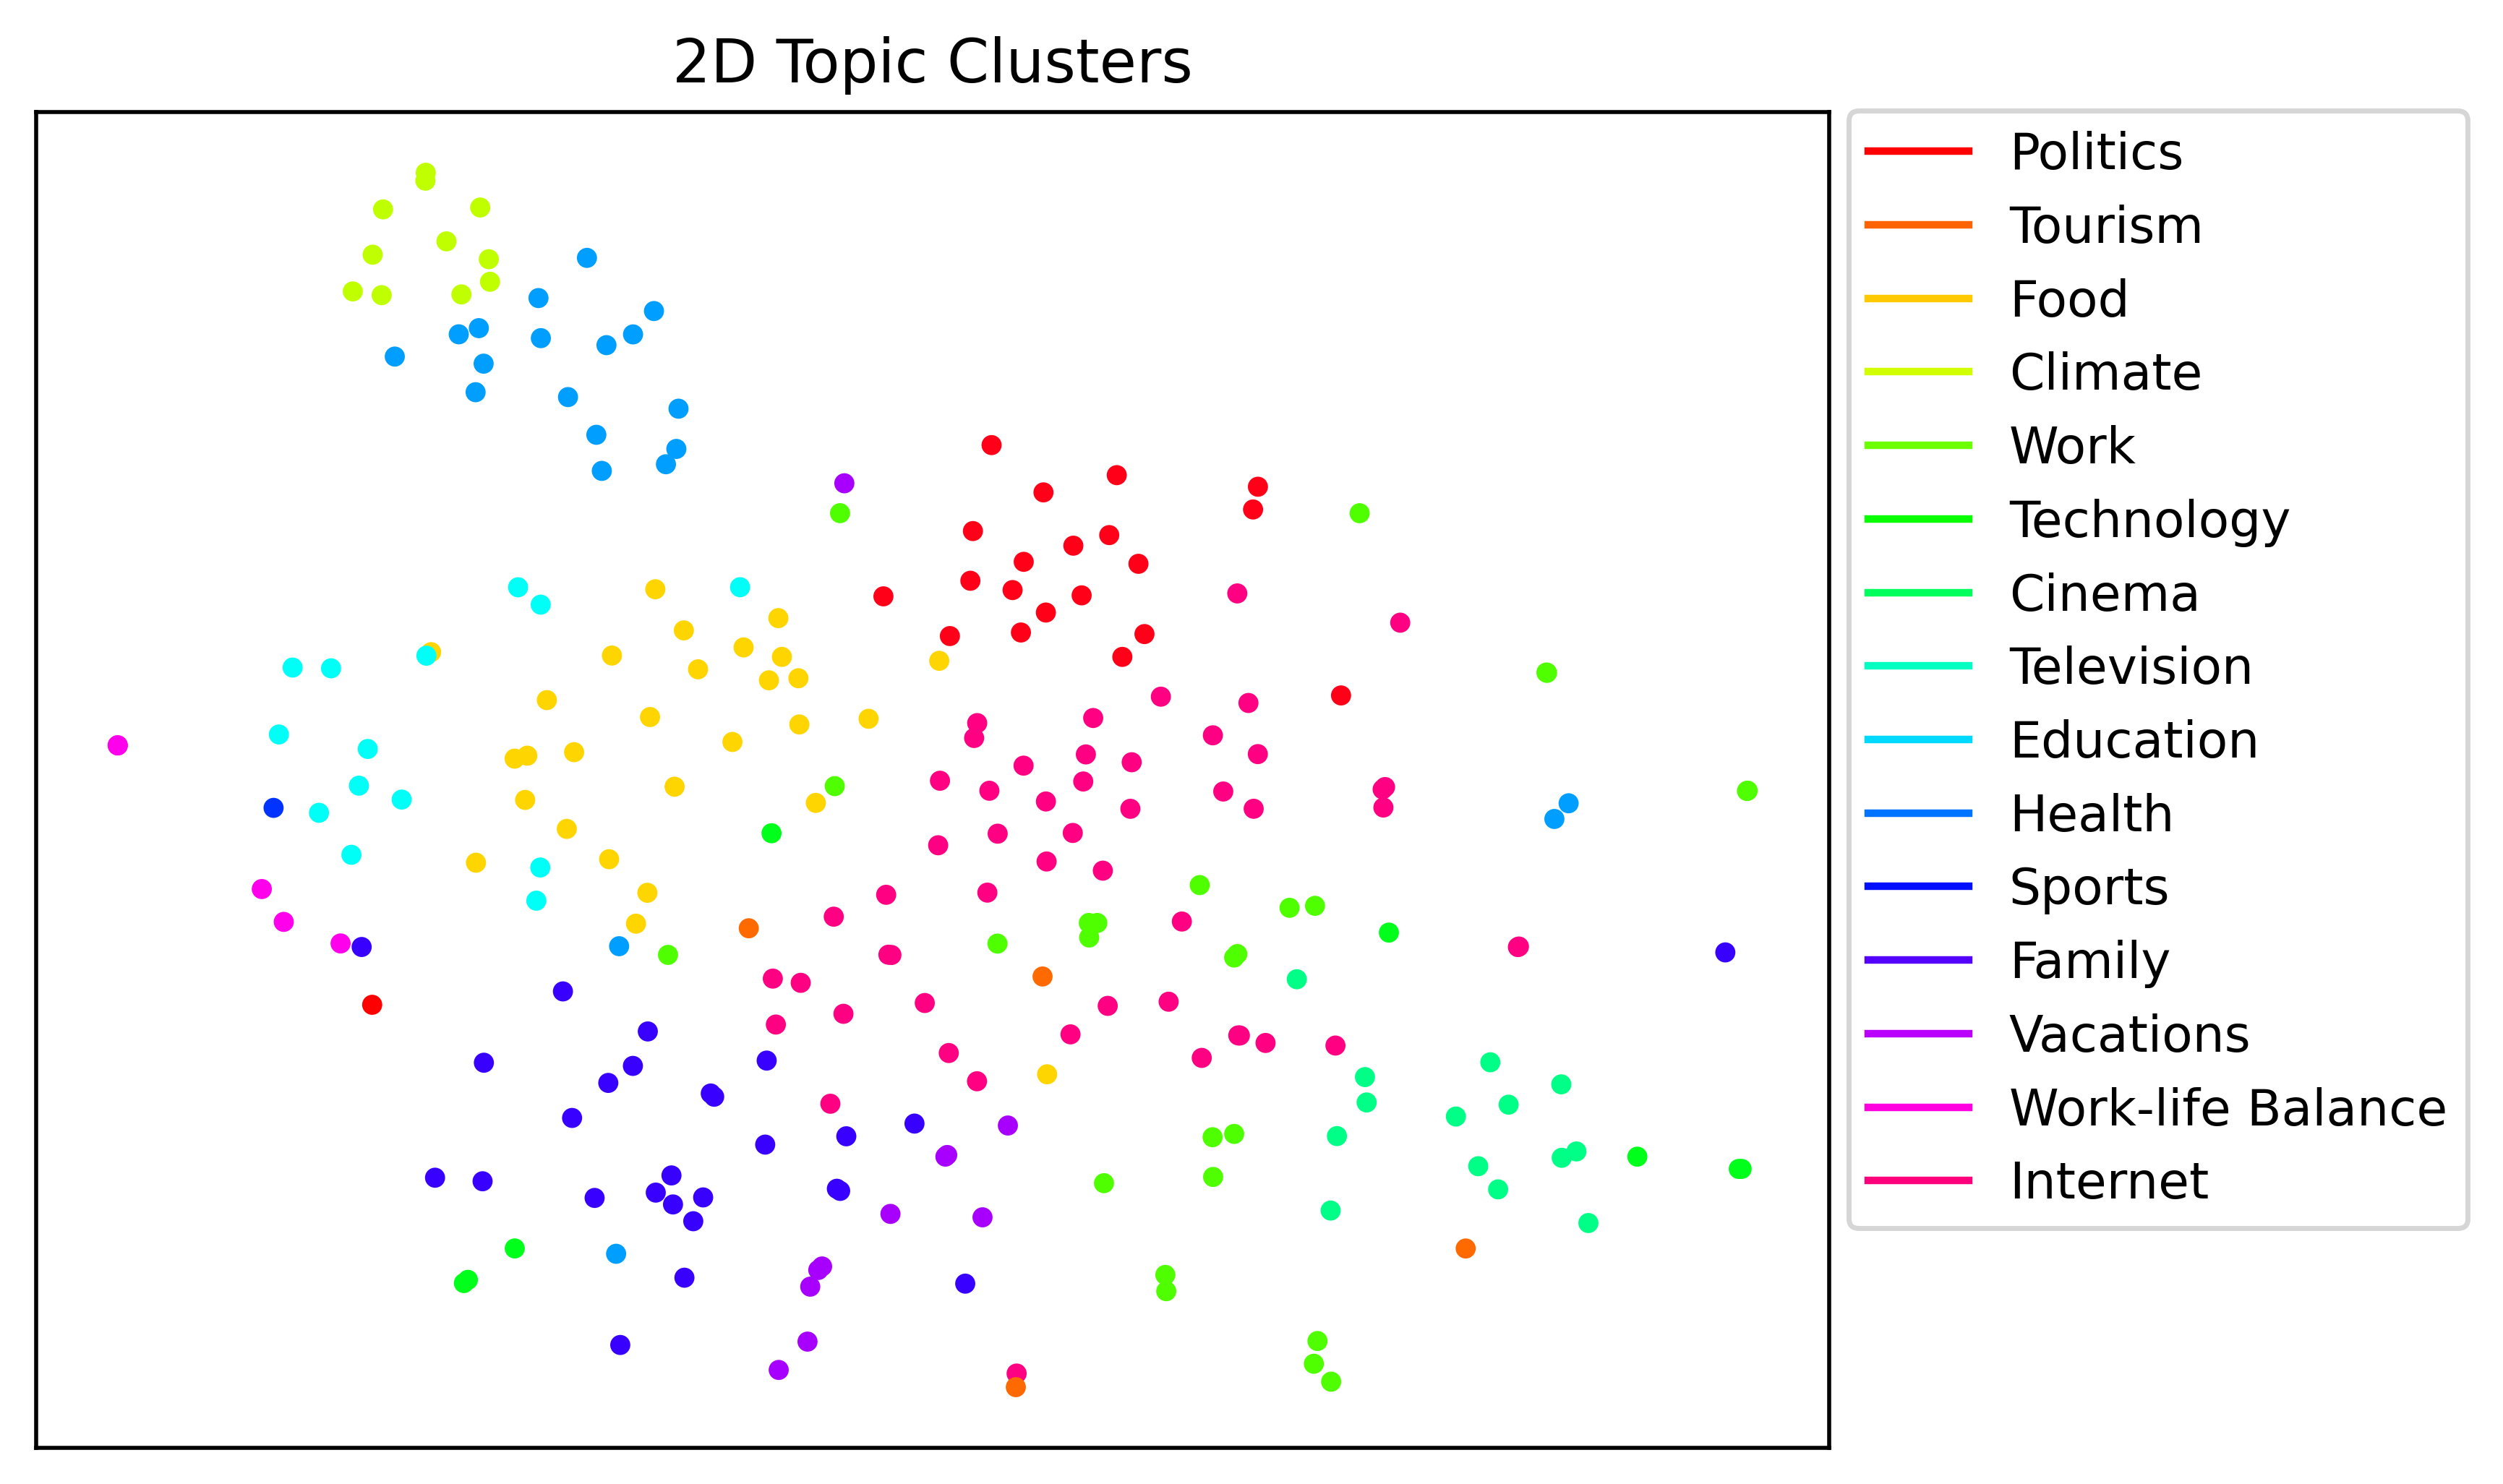

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

plt.rcParams["figure.dpi"] = 500

# Replace the following lines with loading your actual word embeddings
# For this example, I'm creating random embeddings and labels
np.random.seed(42)
X, predicted_labels = df, kmeans.labels_

# Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)


legend_labels = {label: name for label, name in zip(range(15), new_labels)}
handles = [
    plt.Line2D(
        [0],
        [0],
        marker=",",
        color=plt.cm.hsv(label / 15.0),
        label=f"{legend_labels[label]}",
        markersize=10,
    )
    for label in range(15)
]

fig, ax = plt.subplots()

# Plot the 2D visualization with different colors for each cluster
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1], c=predicted_labels, cmap="hsv", marker="."
)
plt.xticks([])
plt.yticks([])
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels, cmap='hsv', marker='.')
plt.title("2D Topic Clusters")
plt.legend(handles=handles, bbox_to_anchor=(1.37, 1.02), loc="upper right")
plt.show()

fig.savefig("topic_cluster.svg", format="svg", dpi=200)

In [ ]:
plt.savefig("topic_cluster.svg", format="svg", dpi=200)

<Figure size 1280x960 with 0 Axes>